# Initialize and Setup

In [1]:
import os
import time

import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import ml_util as utl

save_directory = "figures/Boosting"
model_name = "Boosting"

folders = ["figures/Boosting/Complexity_Analysis",
           "figures/Boosting/Grid_Search_Results",
           "figures/Boosting/Learning_Curves",
           "figures/Boosting/Confusion_Matrix",
           "figures/Boosting/Metrics"]

directories = {
    "Save Directory": "figures/Boosting",
    "Initial Complexity Analysis": "figures/Boosting/Initial Complexity Analysis",
    "Grid Search Results": "figures/Boosting/Grid Search Results",
    "Learning Curves": "figures/Boosting/Learning Curves",
    "Final Complexity Analysis": "figures/Boosting/Final Complexity Analysis"
}

Random_Number = 42
TESTING = True
cv = 5
n_jobs = -1
np.random.seed(42)
get_ipython().system('pip install pyarrow')

  Using cached pyarrow-1.0.1-cp37-cp37m-manylinux2014_x86_64.whl (17.3 MB)


<Figure size 1600x1200 with 0 Axes>

In [2]:
gathered_data = utl.setup(["MNIST"])
gathered_data_fashion = utl.setup(["Fashion-MNIST"])
train_X, train_y, valid_X, valid_y, test_X, test_y = utl.split_data(gathered_data["MNIST"]["X"],
                                                                    gathered_data["MNIST"]["y"], normalize=True)
fashion_train_X, fashion_train_y, fashion_valid_X, fashion_valid_y, fashion_test_X, fashion_test_y = utl.split_data(
    gathered_data_fashion["Fashion-MNIST"]["X"],
    gathered_data_fashion["Fashion-MNIST"]["y"],
    normalize=True)

dataset folder already exists.
MNIST dataset found:
	Loading MNIST.feather
	Finished loading MNIST dataset
dataset folder already exists.
Fashion-MNIST dataset found:
	Loading Fashion-MNIST.feather
	Finished loading Fashion-MNIST dataset


In [3]:
CHECK_FOLDER = os.path.isdir(save_directory)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(save_directory)
    print("created folder : ", save_directory)
else:
    print(save_directory, "folder already exists.")

for f in folders:
    if not os.path.isdir(f):
        os.makedirs(f)
        print("created folder : ", f)
    else:
        print(f, "folder already exists.")

figures/Boosting folder already exists.
figures/Boosting/Complexity_Analysis folder already exists.
figures/Boosting/Grid_Search_Results folder already exists.
figures/Boosting/Learning_Curves folder already exists.
figures/Boosting/Confusion_Matrix folder already exists.
figures/Boosting/Metrics folder already exists.


In [23]:
# Base Estimator ~ default is None, and will be a decision tree with max depth 1. Experiments changing the base 
#   estimators max depth from 1:5

# N Estimators ~ default is 50. Experiment with np.arange(10, 501, 10)

if TESTING:
    val = 600
    pred_val = 600
    train_sizes = np.linspace(0.05, 1.0, 2)
else:
    val = 3000
    pred_val = 3000
    train_sizes = np.linspace(0.05, 1.0, 20)

# Initial Model Complexity: Base Estimator Max Depth
best max depth 6-8

In [28]:
parameter_range = np.arange(1, 20, 1)
    
param_name = 'base_estimator__max_depth'
param_name_plot = 'Base Estimator Max Depth'
mnist_train_results = None
mnist_test_results = None
fashion_train_results = None
fashion_test_results = None

In [32]:
val = 2000

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:    8.9s remaining:   44.0s
[Parallel(n_jobs=-1)]: Done  36 out of  95 | elapsed:   16.5s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done  56 out of  95 | elapsed:   25.5s remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  76 out of  95 | elapsed:   32.4s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   40.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  95 | elapsed:   23.7s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  36 out of  95 | elapsed:   44.5s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  56 out of  95 | elapsed:  1.1min remaining:   44.1s
[Parallel(n_jobs=-1)]: Done  76 out of  95 | elapsed:  1.4min remaining:   21.4s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:  1.8min finished


Run Time: 154.20180106163025s


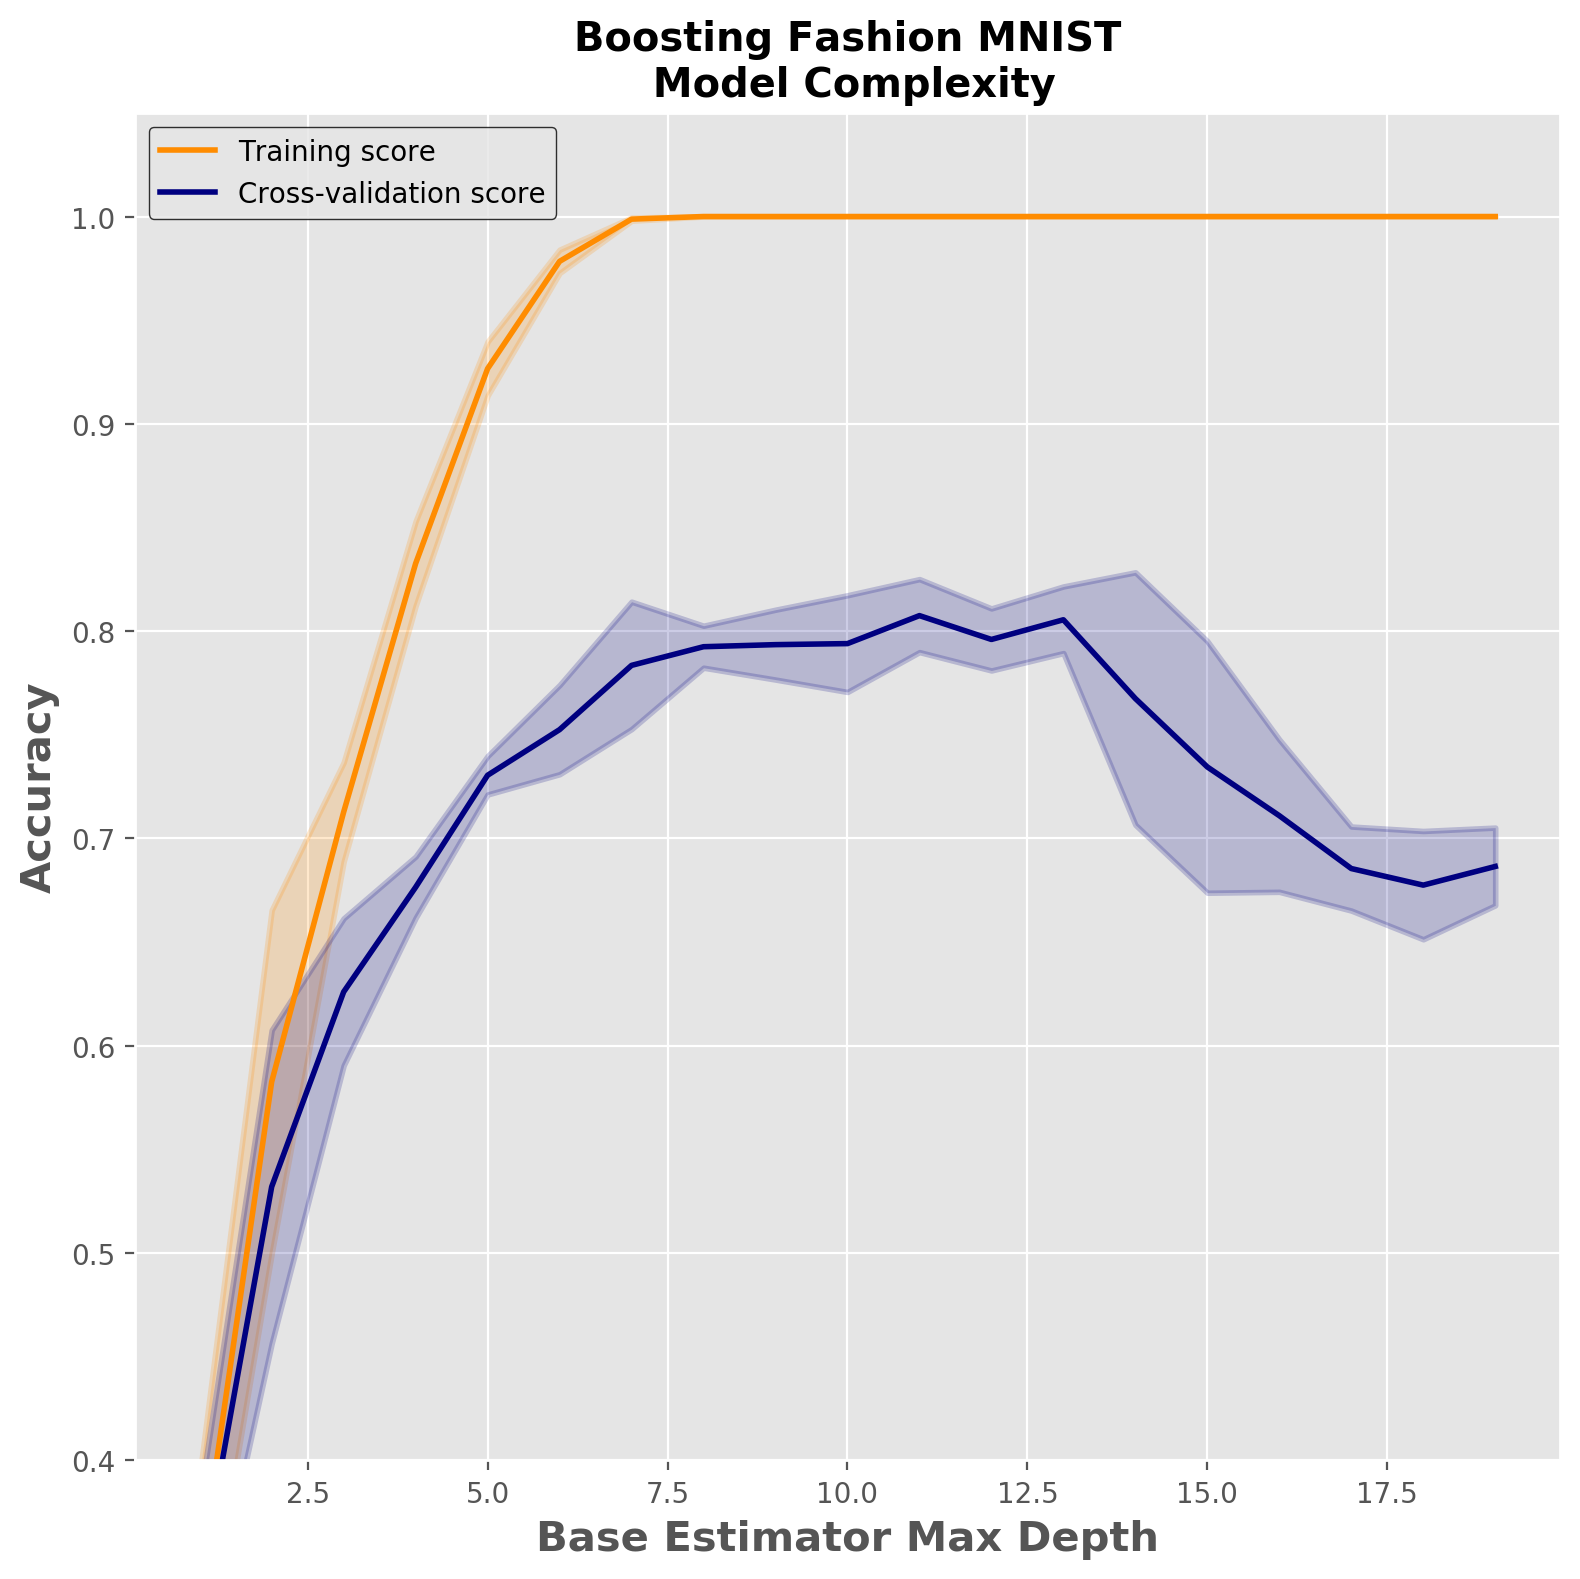

In [33]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        a = "MNIST_BOOST_MAX_DEPTH_INITIAL"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        a = "FASHION_MNIST_BOOST_MAX_DEPTH_INITIAL"
    
    temp_train, temp_test = utl.get_model_complexity(
        classifier=AdaBoostClassifier(DecisionTreeClassifier(random_state=Random_Number)),
        train_X=temp_train_X,
        train_y=temp_train_y, parameter_name=param_name, save_dir=save_directory,
        algorithm_name=algorithm_name, parameter_range=parameter_range, cv=cv,
        n_jobs=n_jobs, verbose=5, backend='loky', param_name_for_plot=param_name_plot,
        is_NN=False, nn_range=parameter_range, plot_title=plot_title, f_name=f_name, fileName=a)
    if i == 0:
        mnist_train_results = temp_train
        mnist_test_results = temp_test
    else:
        fashion_train_results = temp_train
        fashion_test_results = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

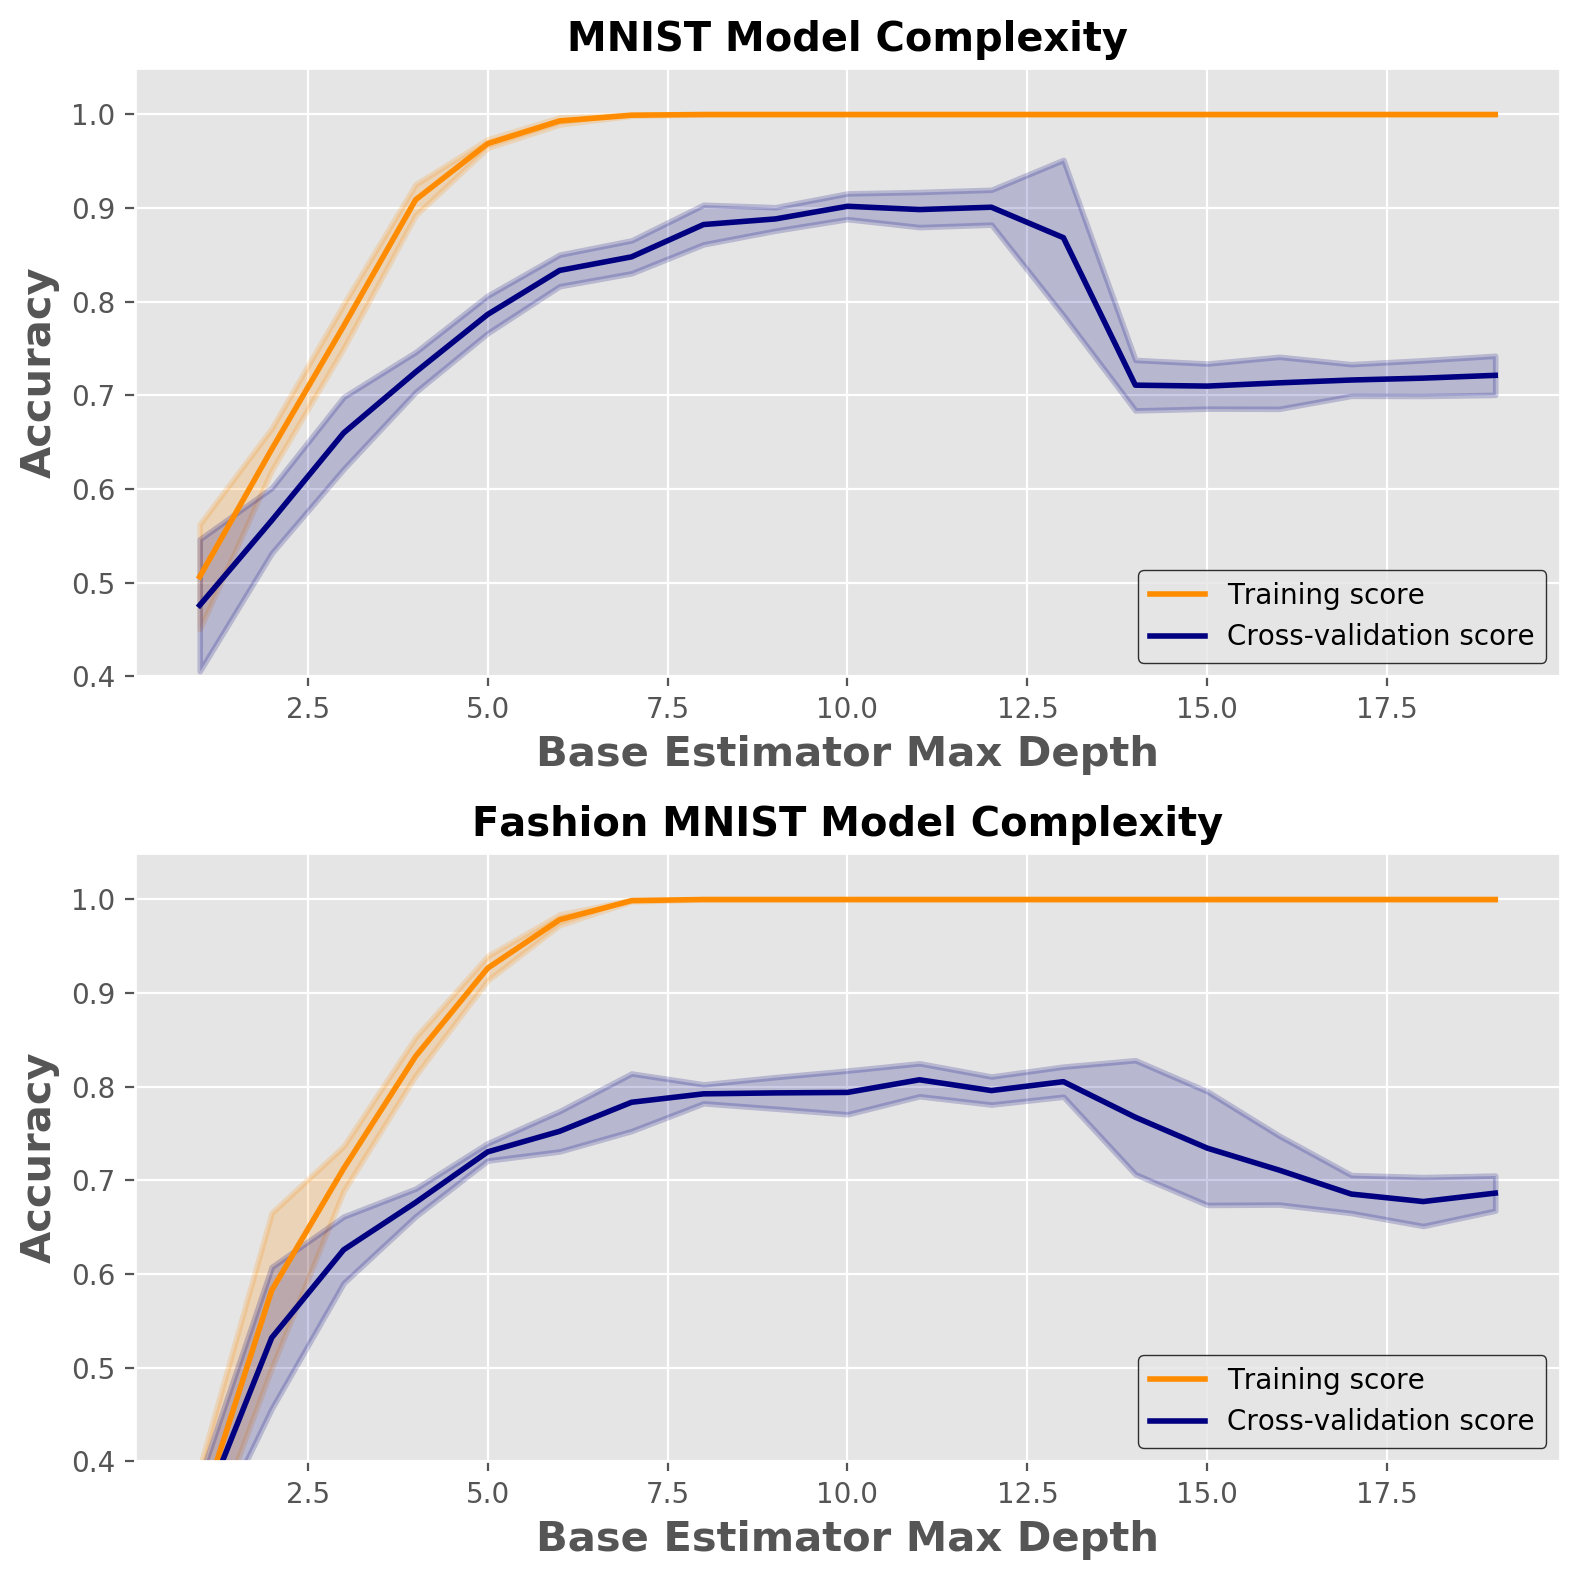

In [34]:
utl.plot_combined_complexity("Boosting", "Base Estimator Max Depth", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             extra_name="Max_Depth_THIS_ONE_Vert")
utl.plot_combined_complexity("Boosting", "Base Estimator Max Depth", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             extra_name="Max_Depth_THIS_ONE_HOR")

# Initial Model Complexity: N Estimators

In [46]:
parameter_range = np.arange(100, 500+1, 100)
    
param_name = 'n_estimators'
param_name_plot = 'Number of Estimators'
mnist_train_results = None
mnist_test_results = None
fashion_train_results = None
fashion_test_results = None

In [40]:
val=2000

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:   27.0s remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  1.3min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:  1.7min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.0min remaining:   29.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  25 | elapsed:  1.0min remaining: 12.0min
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  3.1min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:  3.9min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  4.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.5min finished


Run Time: 555.126537322998s


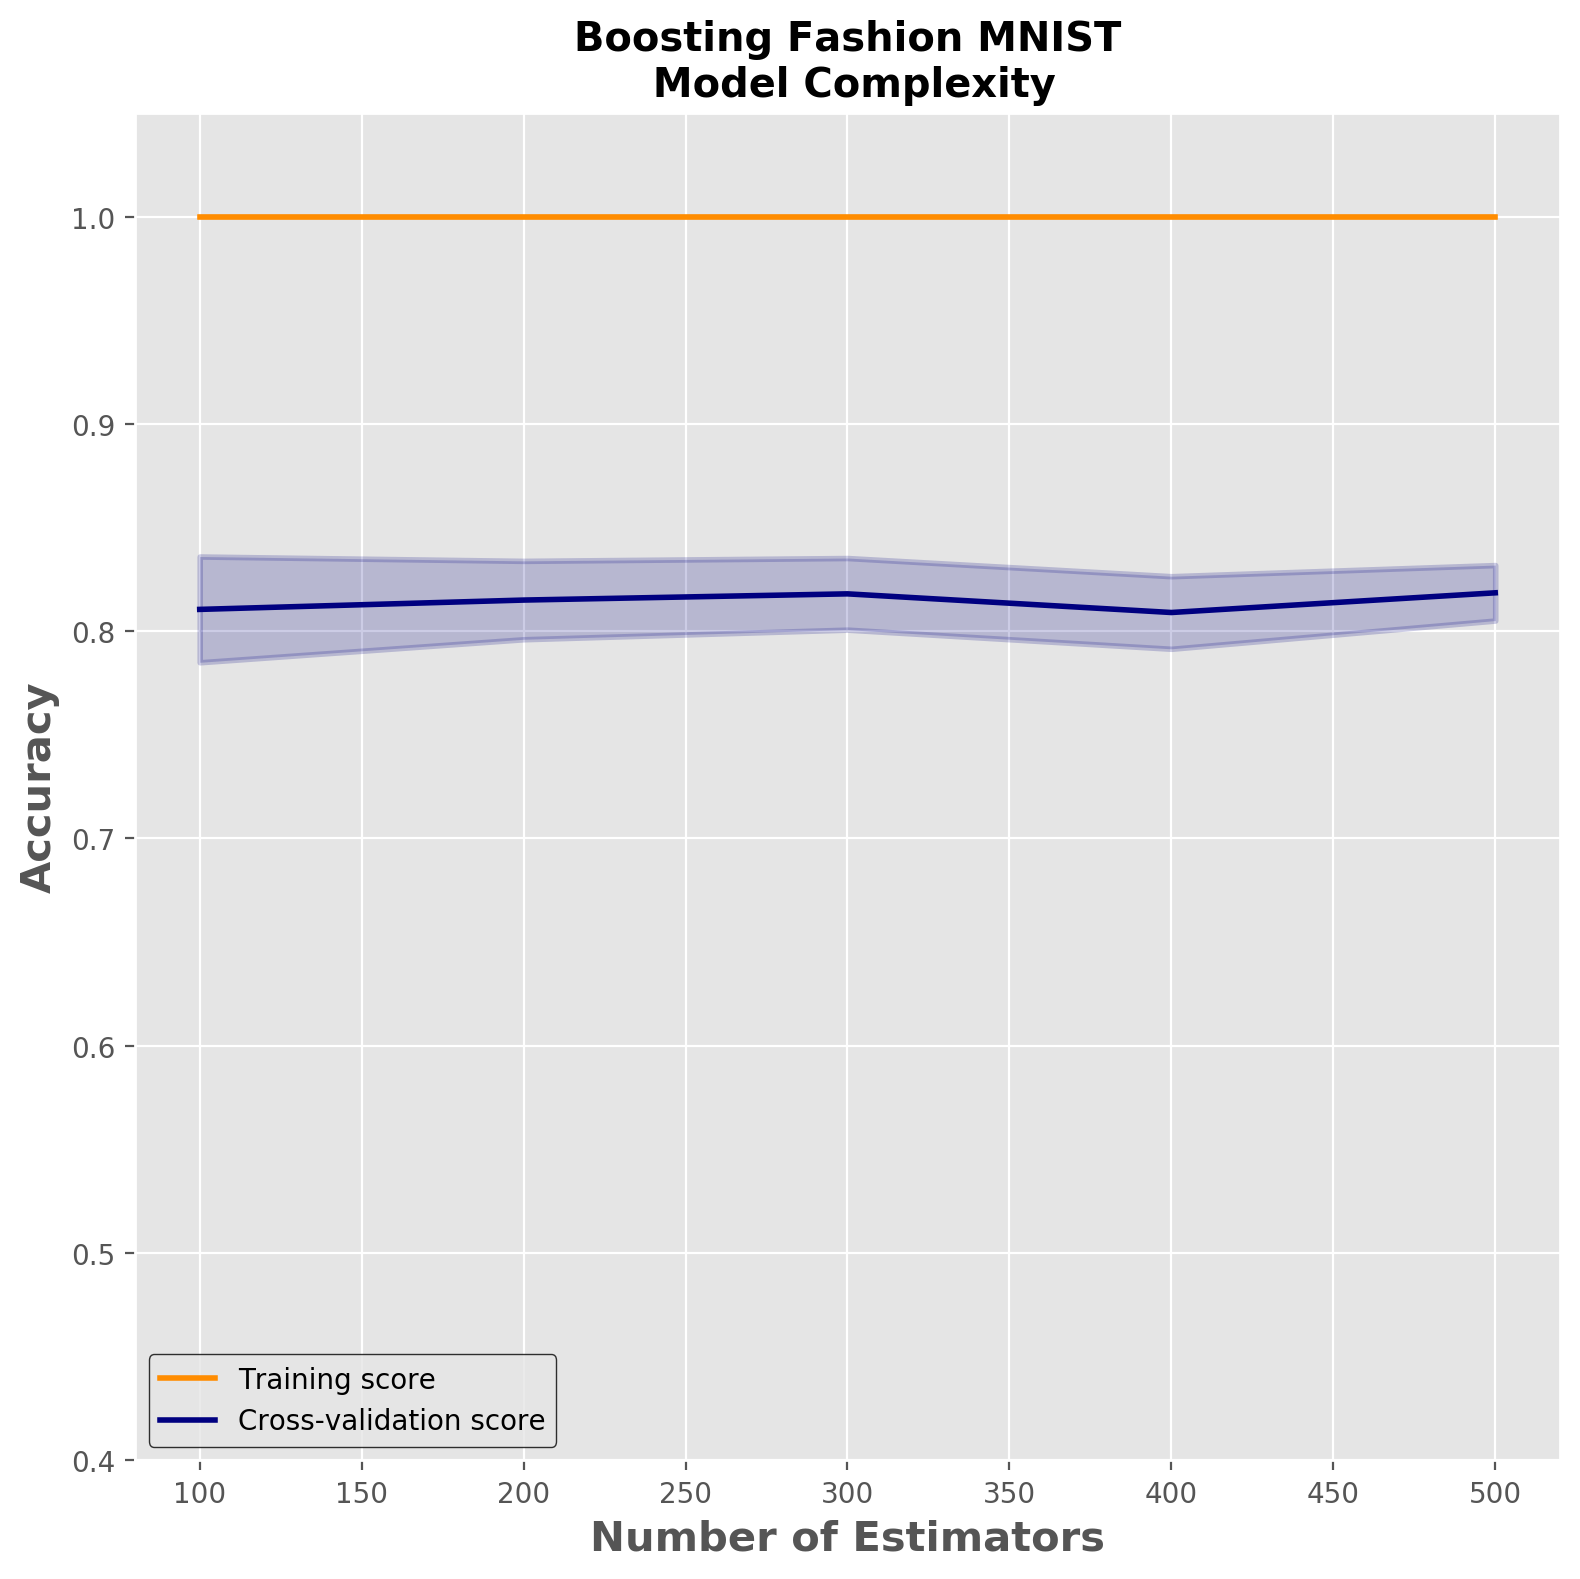

In [47]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:2000, :]
        temp_train_y = train_y.iloc[:2000]
        f_name = f"{model_name}_{param_name}_MNIST"
        algorithm_name = f"{model_name} {param_name} MNIST\n Model Complexity"
        plot_title = f"{model_name} MNIST\n Model Complexity"
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=Random_Number))
        a = "MNIST_BOOST_N_ESTIMATORS"
    else:
        temp_train_X = fashion_train_X.iloc[:2000, :]
        temp_train_y = fashion_train_y.iloc[:2000]
        f_name = f"{model_name}_{param_name}_Fashion_MNIST"
        algorithm_name = f"{model_name} {param_name} Fashion MNIST\n Model Complexity"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11, random_state=Random_Number))
        a = "FASHION_MNIST_BOOST_N_ESTIMATORS"
    
    temp_train, temp_test = utl.get_model_complexity(
        classifier=clf,
        train_X=temp_train_X,
        train_y=temp_train_y, parameter_name=param_name, save_dir=save_directory,
        algorithm_name=algorithm_name, parameter_range=parameter_range, cv=cv,
        n_jobs=n_jobs, verbose=5, backend='loky', param_name_for_plot=param_name_plot,
        is_NN=False, nn_range=parameter_range, plot_title=plot_title, f_name=f_name, fileName=a)
    if i == 0:
        mnist_train_results = temp_train
        mnist_test_results = temp_test
    else:
        fashion_train_results = temp_train
        fashion_test_results = temp_test

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

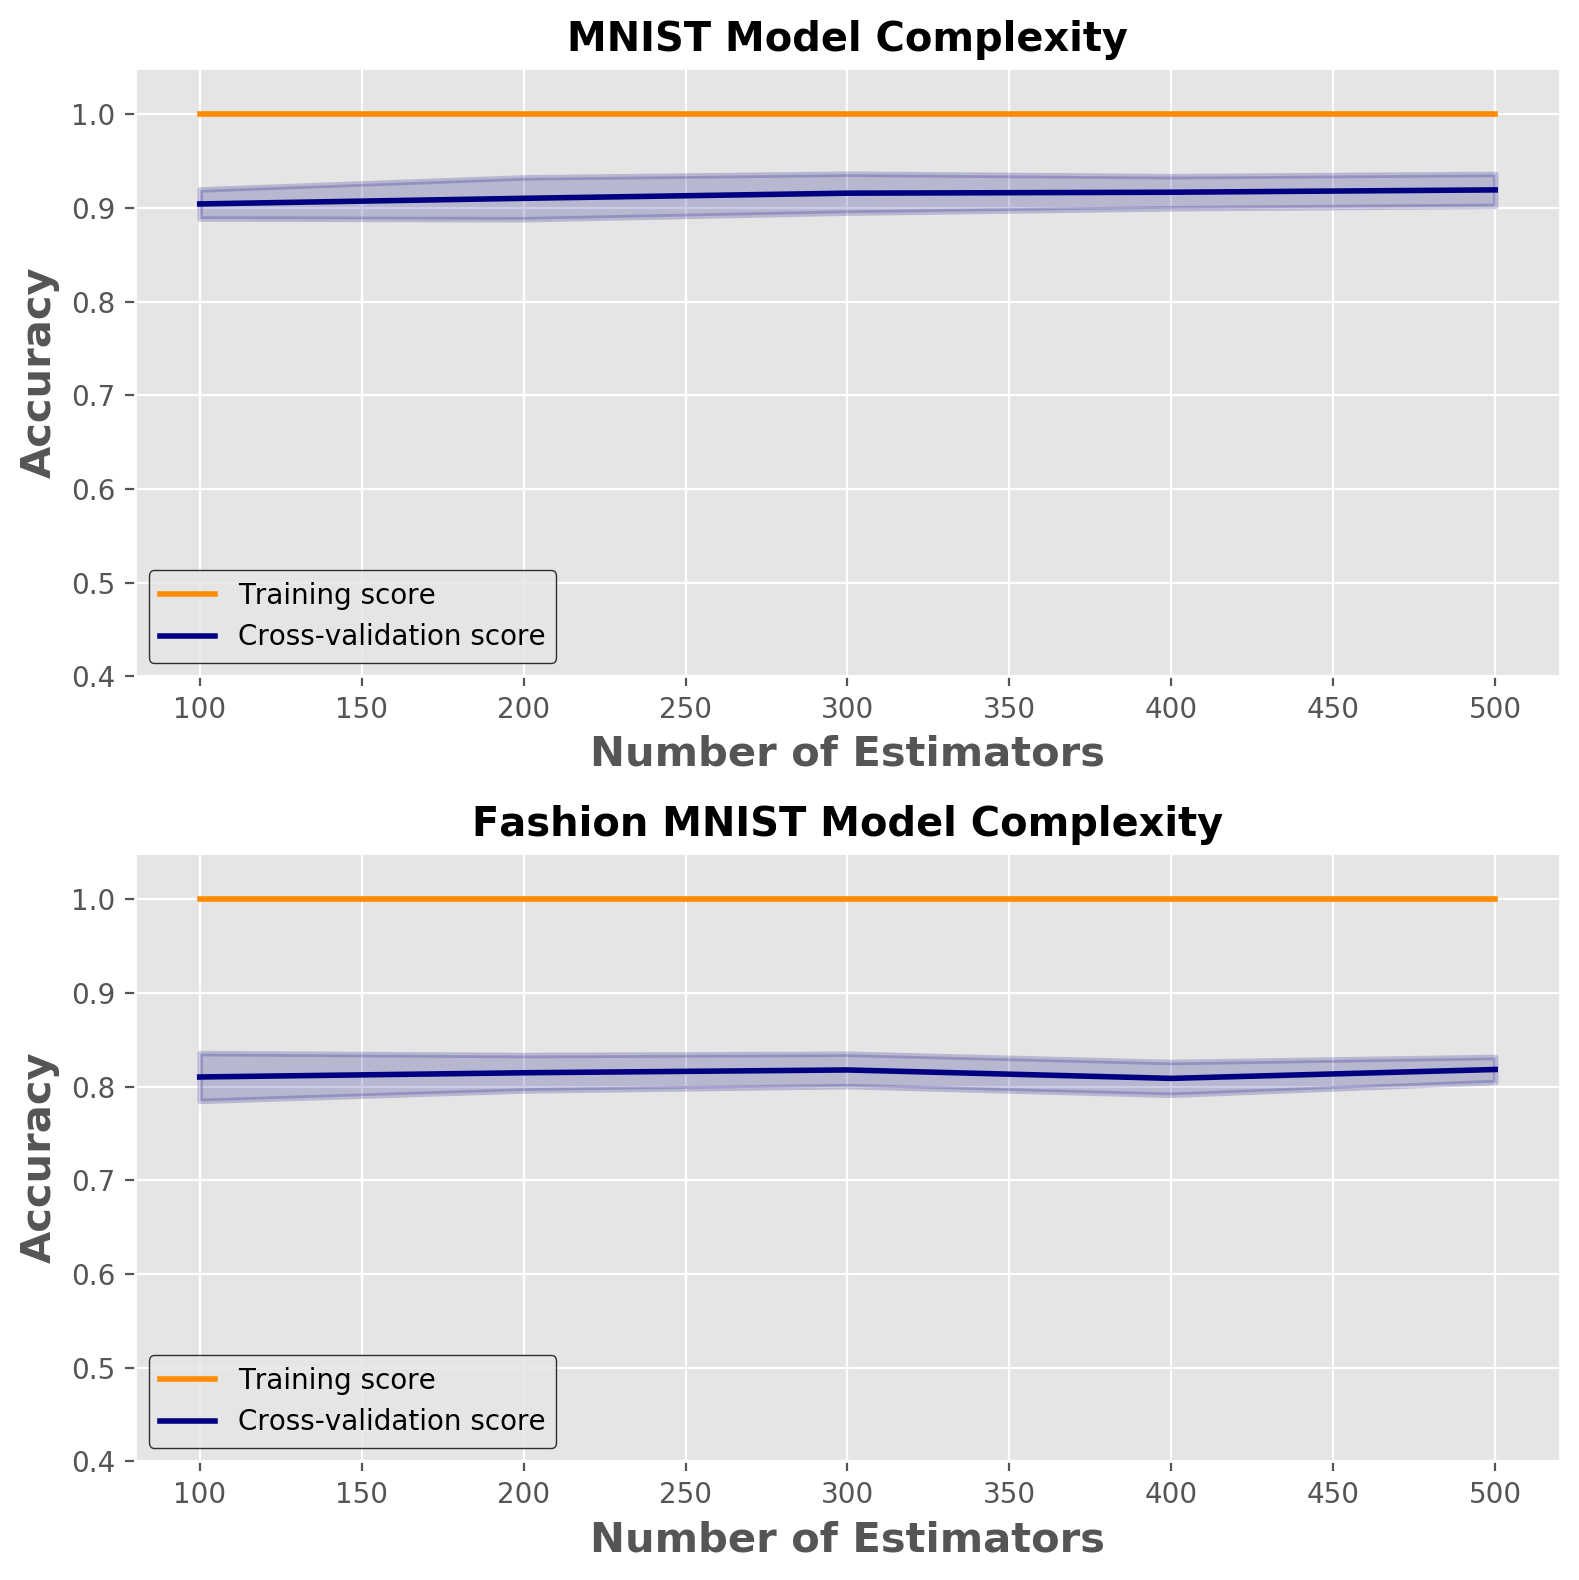

In [49]:
utl.plot_combined_complexity("Boosting", "Number of Estimators", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Horizontal', plt_width=12, plt_height=6,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             extra_name="N_ESTIMATORS_MNIST")
utl.plot_combined_complexity("Boosting", "Number of Estimators", is_NN=False, is_SVM=False,
                             parameter_range=parameter_range, orientation='Vertical', plt_height=8,
                             mnist_train_complex=mnist_train_results, mnist_test_complex=mnist_test_results,
                             fashion_train_complex=fashion_train_results, fashion_test_complex=fashion_test_results,
                             extra_name="N_ESTIMATORS_Fashion")

# Initial Model Complexity: Learning Rate

# Initial Confusion Matrix

In [ ]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9, random_state=Random_Number))
clf.fit(train_X.iloc[:val, :], train_y.iloc[:val])

clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9, random_state=Random_Number))
clf2.fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])

In [ ]:
utl.plot_combined_confusion_matrix(clf, test_X, test_y, clf2, fashion_test_X, fashion_test_y,
                                   directory=save_directory, fmt=None, plot_width=12, plot_height=6)

# Initial Learning Curve

In [ ]:
val = 2000
train_sizes = np.linspace(0.05, 1.0, 20)

In [ ]:

start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "dt_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9, random_state=Random_Number))
        a = "MNIST_BOOST_N_ESTIMATORS"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9, random_state=Random_Number))
        a = "FASHION_MNIST_BOOST_N_ESTIMATORS"
    
    res['dt_results'], res['cv_results'] = utl.plot_learning_curve(
        estimator=clf,
        title=title, train_X=temp_train_X,
        train_y=temp_train_y, cv=cv, f_name=f_name,
        folder="Boosting", train_sizes=train_sizes,
        save_individual=True, TESTING=True,
        n_jobs=n_jobs, backend='loky', extra_name=a)
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

# Initial Metrics

In [ ]:
clf = AdaBoostClassifier(DecisionTreeClassifier())# need to change to reflect learning curve results
p, r, f1 = utl.plot_precision_recall(clf, train_X.iloc[:val, :], train_y.iloc[:val], valid_X.iloc[:val, :],
                                 valid_y.iloc[:val], folder="Boosting", dataset_name="MNIST",
                                 plot_title="Ada Boost")

# Gridsearch

In [ ]:
if TESTING:
    all_parameters = {
        'n_estimators': np.arange(10, 60 + 1, 10),
        'base_estimator__max_depth': np.arange(6, 9, 1)
    }
else:
    all_parameters = {
        'n_estimators': np.arange(20, 100+1, 20),
        'base_estimator__max_depth': np.arange(6, 9, 1)
    }
    
best_mnist_estimator = None
best_fashion_estimator = None

In [ ]:
start_time = time.time()
for i in range(2):
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        algorithm_name = f"{model_name}_MNIST"
        plot_title = f"{model_name} MNIST\n Model Complexity"
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        algorithm_name = f"{model_name}_Fashion_MNIST"
        plot_title = f"{model_name} Fashion MNIST\n Model Complexity"
    
    grid_results_mnist, optimized_dt_mnist = utl.run_grid_search(
        classifier=AdaBoostClassifier(DecisionTreeClassifier(random_state=Random_Number)),
        parameters=all_parameters, train_X=temp_train_X,
        train_y=temp_train_y, cv=cv,
        n_jobs=n_jobs, verbose=5, return_train_score=True,
        refit=True, save_dir=save_directory,
        algorithm_name=algorithm_name, backend='loky')
    print(f"Best Parameters:\n\t {optimized_dt_mnist.best_params_}")
    if i == 0:
        best_mnist_estimator = optimized_dt_mnist.best_estimator_
    else:
        best_fashion_estimator = optimized_dt_mnist.best_estimator_

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")


# Final Learning Curve

In [51]:
val = 4000
train_sizes = np.linspace(0.05, 1.0, 20)

Working on learning curve: 0
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1489s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    5.2s remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   26.2s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   43.7s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  1.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.1min remaining:   59.4s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  2.4min remaining:   37.7s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  2.8min remaining:   18.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished


Working on learning curve: 1
[learning_curve] Training set sizes: [ 160  320  480  640  800  960 1120 1280 1439 1599 1759 1920 2080 2240
 2400 2560 2720 2880 3040 3200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    0.2s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   56.0s remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:  1.7min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  2.4min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  3.1min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  3.8min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  4.6min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  5.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  6.3min remaining:   42.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.2min finished


Run Time: 642.0735306739807s


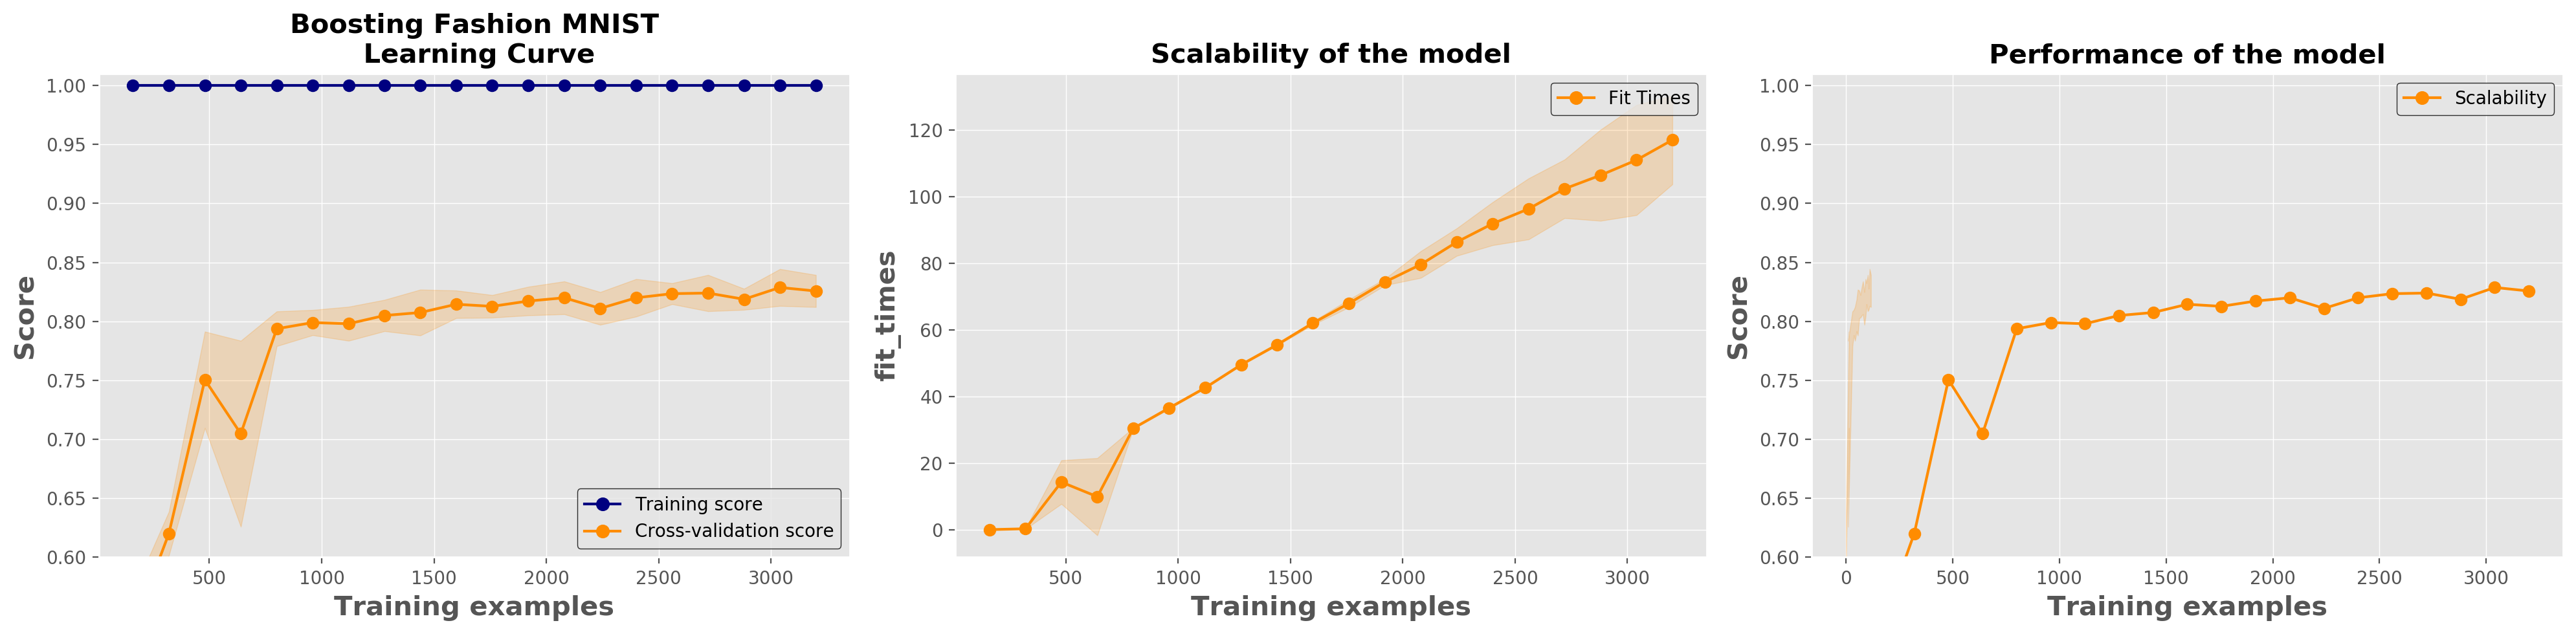

In [52]:
start_time = time.time()
results = []
for i in range(2):
    print(f"Working on learning curve: {i}")
    res = {"plt": None,
           "dt_results": None,
           "cv_results": None}
    if i == 0:
        temp_train_X = train_X.iloc[:val, :]
        temp_train_y = train_y.iloc[:val]
        title = f"{model_name} MNIST\n Learning Curve"
        f_name = f"{model_name}_MNIST"
        ex="MNIST_BOOST_FINAL_"
        optimized_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=Random_Number), n_estimators=100)
    else:
        temp_train_X = fashion_train_X.iloc[:val, :]
        temp_train_y = fashion_train_y.iloc[:val]
        title = f"{model_name} Fashion MNIST\n Learning Curve"
        f_name = f"{model_name}_Fashion_MNIST"
        ex="FASHION_MNIST_BOOST_FINAL_"
        optimized_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11, random_state=Random_Number), n_estimators=100)
    
    res['dt_results'], res['cv_results'] = utl.plot_learning_curve(estimator=optimized_boost,
                                                                   title=title, train_X=temp_train_X,
                                                                   train_y=temp_train_y, cv=cv, f_name=f_name,
                                                                   folder="Boosting", train_sizes=train_sizes,
                                                                   save_individual=True, TESTING=True,
                                                                   n_jobs=n_jobs, backend='loky',
                                                                   extra_name=f"Final_Learning_Curve_{ex}")
    results.append(res)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Run Time: {elapsed_time}s")

In [56]:
mnist = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, random_state=Random_Number), n_estimators=100).fit(train_X.iloc[:val, :], train_y.iloc[:val])
fashion = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11, random_state=Random_Number), n_estimators=100).fit(fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val])     

# Final Confusion Matrix on Test set "(O_o)"

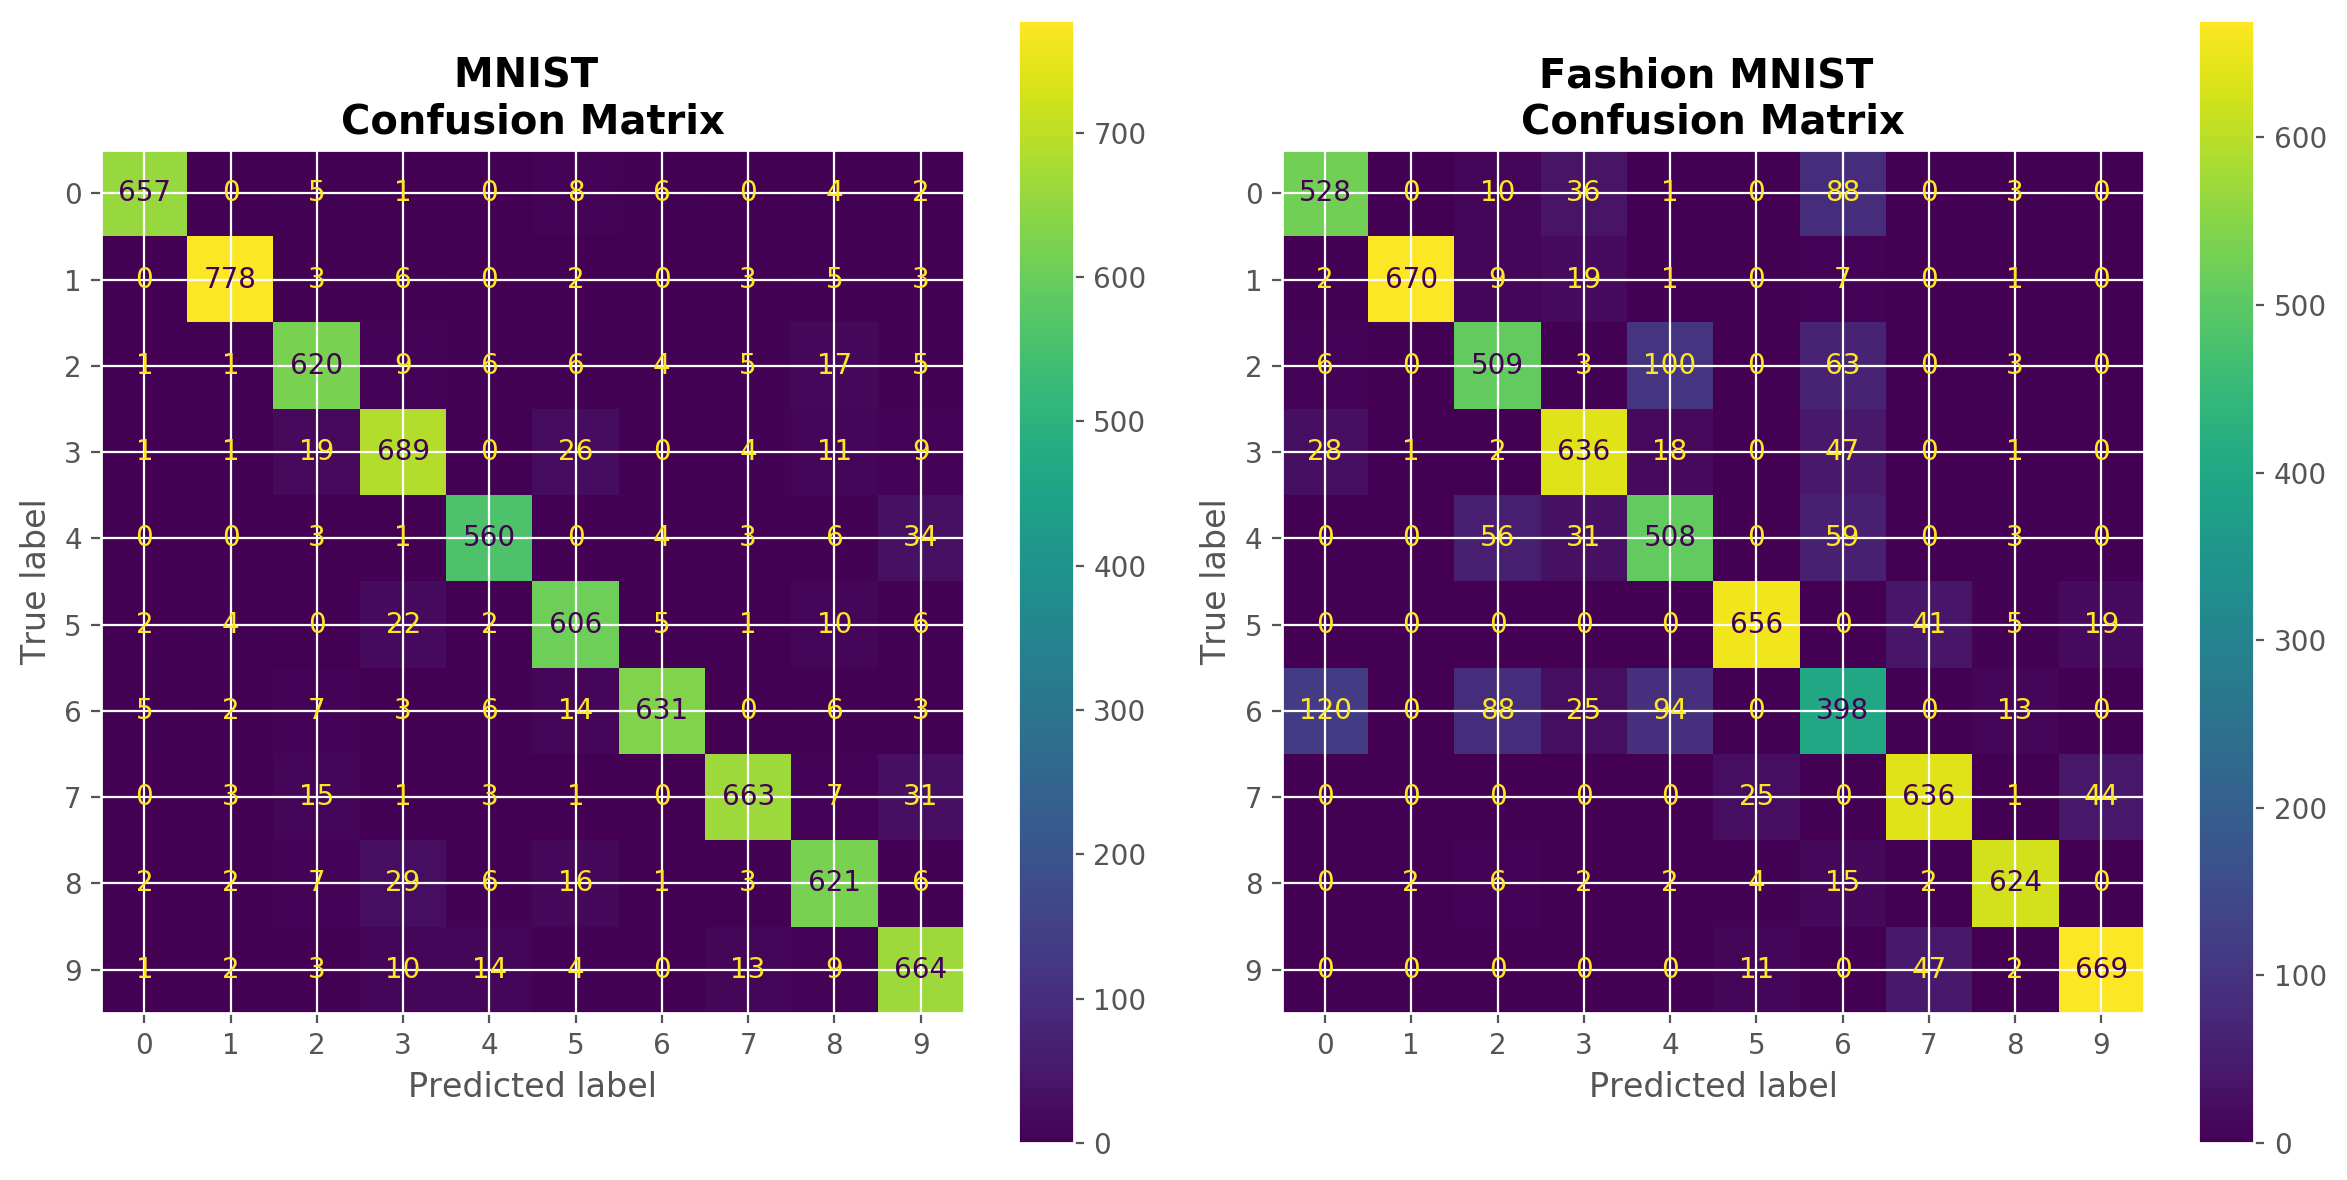

In [59]:
utl.plot_combined_confusion_matrix(mnist, test_X, test_y, 
                                   fashion, fashion_test_X,
                                   fashion_test_y,
                                   directory=save_directory, fmt="d", plot_width=12, plot_height=6,
                                   extra_name="Boosting_Final_confusion")

# Final Metrics

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_mnist_estimator, train_X.iloc[:val, :], train_y.iloc[:val], test_X.iloc[:val, :],
                                 test_y.iloc[:val], folder="Boosting", dataset_name="MNIST",
                                 plot_title="Ada Boost Test Set", is_final=True)

In [ ]:
p, r, f1 = utl.plot_precision_recall(best_fashion_estimator, fashion_train_X.iloc[:val, :], fashion_train_y.iloc[:val], 
                                     fashion_test_X.iloc[:val, :], fashion_test_y.iloc[:val], 
                                     folder="Boosting", dataset_name="Fashion MNIST",
                                     plot_title="Ada Boost Test Set", is_final=True)